In [1]:
cd ../myproject

/Users/linlincheng/Desktop/interviews/myproject/myproject


In [3]:
from sarimax import SarimaxDengModel
from utils.utils import load_data, filter_city_data

In [4]:
data = load_data("../data/")
sj_data = filter_city_data(data, city_name="sj")
iq_data = filter_city_data(data, city_name="iq")

In [5]:
SjModel = SarimaxDengModel(data=data, city_name="sj", test_period=0)
SjModel.train_models(run_param_search=False)

/Users/linlincheng/Desktop/interviews/myproject/myproject/base.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["week_start_date"] = pd.to_datetime(data.week_start_date)
/Users/linlincheng/Desktop/interviews/myproject/myproject/base.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month"] = data.week_start_date.dt.month.astype(float)


ADF Statistic: -6.650077901931183
p-value: 5.147318673759477e-09
p-value less than 0.05, series likely stationary


/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,city,year,weekofyear,forecast
0,sj,2008,18,0
1,sj,2008,19,9
2,sj,2008,20,0
3,sj,2008,21,23
4,sj,2008,22,38
...,...,...,...,...
255,sj,2013,13,0
256,sj,2013,14,11
257,sj,2013,15,9
258,sj,2013,16,4


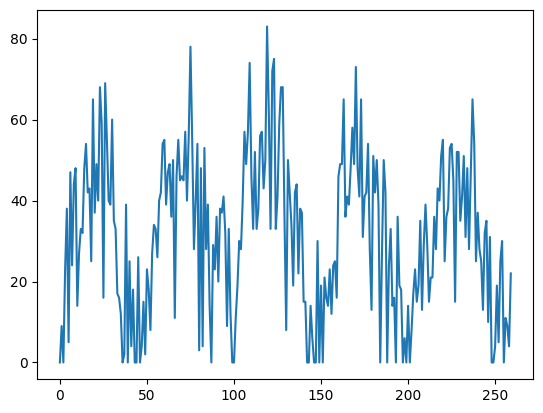

In [6]:
submission_file = SjModel.generate_submission_file(filepath="../data/")
submission_file

In [53]:
IqModel = SarimaxDengModel(data=iq_data, city_name="iq", test_period=0)
IqModel.train_models(run_param_search=False)

ADF Statistic: -6.085428681900052
p-value: 1.0672522948401876e-07
p-value less than 0.05, series likely stationary


/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/linlincheng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,city,year,weekofyear,forecast
0,iq,2010,26,2
1,iq,2010,27,4
2,iq,2010,28,4
3,iq,2010,29,5
4,iq,2010,30,8
...,...,...,...,...
151,iq,2013,22,7
152,iq,2013,23,6
153,iq,2013,24,5
154,iq,2013,25,4


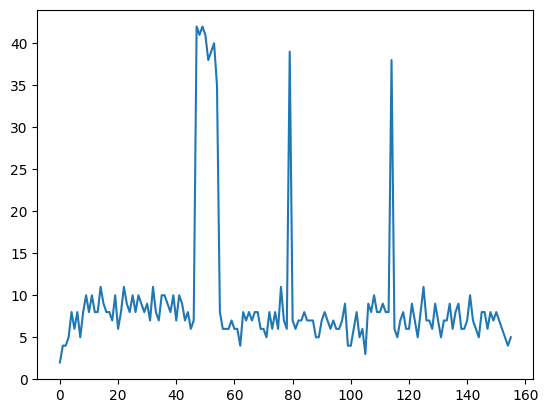

In [56]:
IqModel.generate_submission_file(filepath="../data/")